In [19]:
# importar bibliotecas
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# definir tabela
notas = pd.read_csv('data.csv')

# mostrar tabela
display(notas)

,E1,E2,E3,E4
0,94.0,60.0,88.0,100.0
1,85.0,85.0,NaN,NaN
2,NaN,NaN,100.0,100.0
3,NaN,NaN,85.0,85.0
4,82.0,53.0,NaN,NaN
5,100.0,100.0,NaN,NaN
6,84.0,73.0,86.0,76.0
7,95.0,91.0,85.0,64.0
8,83.0,60.0,NaN,NaN
9,72.0,73.0,82.0,95.0


In [20]:
# gerar tabela de frequências absolutas
resultados = []

for i in range(0, 91, 10):
    
    intervalo_inferior = i
    intervalo_superior = i + 10
    
    if i < 90:
        contagem_total_intervalo = ((notas >= intervalo_inferior) & (notas < intervalo_superior)).sum().sum()
        intervalo = f"{intervalo_inferior} |-- {intervalo_superior}"
        media = np.mean([intervalo_inferior, intervalo_superior])
    else:
        contagem_total_intervalo = ((notas >= intervalo_inferior) & (notas <= intervalo_superior)).sum().sum()
        intervalo = f"{intervalo_inferior} |--| {intervalo_superior}"
        media = np.mean([intervalo_inferior, intervalo_superior])
    
    resultados.append([intervalo, contagem_total_intervalo, media])

dados_agrupados = pd.DataFrame(resultados, columns=["Intervalo", "frequencia_absoluta", "Media"])

# filtrar linhas de valor 0
dados_agrupados = dados_agrupados[dados_agrupados["frequencia_absoluta"] != 0]

# cacular média
dados_agrupados['Xa * Xm'] = dados_agrupados['frequencia_absoluta'] * dados_agrupados['Media']
media = dados_agrupados['Xa * Xm'].sum()/dados_agrupados["frequencia_absoluta"].sum()

# mostrar média
print(f"A média é: {media}")

# mostrar tabela
display(dados_agrupados)

A média é: 84.28571428571429


,Intervalo,frequencia_absoluta,Media,Xa * Xm
5,50 |-- 60,1,55.0,55.0
6,60 |-- 70,5,65.0,325.0
7,70 |-- 80,7,75.0,525.0
8,80 |-- 90,12,85.0,1020.0
9,90 |--| 100,17,95.0,1615.0


In [21]:
# calcular media
media_linha = notas.mean()
# print('Média de cada linha:\n')
# print(media_linha)
media_total = media_linha.mean()
print(f'\nMédia total: {media_total}')

# colocar valores em rol (útil para quando for passar para folha)
valores_rol = notas.values.flatten()
valores_rol = [nota for nota in valores_rol if not np.isnan(nota)]
valores_rol.sort()

print(sum(valores_rol
          ))
print("\nLista em rol:\n")
print(valores_rol)

# calcular mediana
print(f"\nMediana: {np.median(valores_rol)}")

# achar moda
valores, contagem = np.unique(valores_rol, return_counts=True)

maior_contagem = np.max(contagem)
moda_notas = valores[contagem == maior_contagem]

print(f"\nA moda é: {moda_notas}")

# mostrar tabela
display(notas)


Média total: 84.65454545454546
3553.0

Lista em rol:

[53.0, 60.0, 60.0, 60.0, 64.0, 65.0, 70.0, 72.0, 72.0, 73.0, 73.0, 73.0, 76.0, 82.0, 82.0, 83.0, 84.0, 85.0, 85.0, 85.0, 85.0, 85.0, 85.0, 86.0, 88.0, 91.0, 94.0, 95.0, 95.0, 96.0, 96.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]

Mediana: 85.0

A moda é: [100.]


,E1,E2,E3,E4
0,94.0,60.0,88.0,100.0
1,85.0,85.0,NaN,NaN
2,NaN,NaN,100.0,100.0
3,NaN,NaN,85.0,85.0
4,82.0,53.0,NaN,NaN
5,100.0,100.0,NaN,NaN
6,84.0,73.0,86.0,76.0
7,95.0,91.0,85.0,64.0
8,83.0,60.0,NaN,NaN
9,72.0,73.0,82.0,95.0


In [22]:
# calcular desvio padrão
tabela_padrao = pd.DataFrame(valores_rol, columns=["Valores"]) 

# calcular média
media = tabela_padrao["Valores"].mean()
print(f"A média é: {media}")

# calcular variância
tabela_padrao["(Xn-X)^2"] = (tabela_padrao["Valores"] - media)**2
variancia = tabela_padrao["(Xn-X)^2"].mean()
print(f"A variância é: {variancia}")

# calcular o desvio padrão
desvio_padrao = np.sqrt(variancia)
print(f"O desvio padrão é: {desvio_padrao}")

# mostrar tabela
display(tabela_padrao)

A média é: 84.5952380952381
A variância é: 187.52664399092973
O desvio padrão é: 13.694036804059266


,Valores,(Xn-X)^2
0,53.0,998.259070
1,60.0,604.925737
2,60.0,604.925737
3,60.0,604.925737
4,64.0,424.163832
5,65.0,383.973356
6,70.0,213.020975
7,72.0,158.640023
8,72.0,158.640023
9,73.0,134.449546


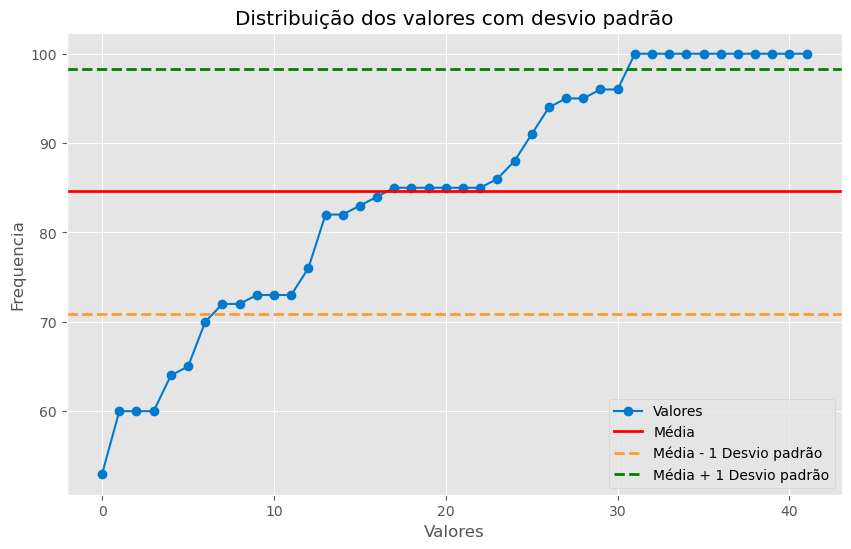

In [29]:
# gerar historiograma
plt.style.use('ggplot')

# preparar os valores x e y
x = np.arange(len(valores_rol))
y = np.array(valores_rol)

# configurar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color="#007acc", label = 'Valores')
plt.axhline(media, color='red', linestyle='-', linewidth=2, label='Média')
plt.axhline(media - desvio_padrao, color='#ff9933', linestyle='dashed', linewidth=2, label='Média - 1 Desvio padrão')
plt.axhline(media + desvio_padrao, color='green', linestyle='dashed', linewidth=2, label='Média + 1 Desvio padrão')

# adicionar título e rótulo
plt.title('Distribuição dos valores com desvio padrão')
plt.xlabel('Valores')
plt.ylabel('Frequencia')
plt.legend()

# mostrar gráfico
plt.show()